<a href="https://colab.research.google.com/github/johnboscoimmanuel/Task/blob/main/Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [ ]:
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [ ]:
from sklearn.linear_model import LinearRegression

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [ ]:
x=df['Chirps/Second']
y=df['Ground Temperature']
x=x.values.reshape(-1,1)
y=y.values

lr=LinearRegression().fit(x,y)
#lr.fit(x,y)

print('Reg Coefficent/Slope: ',lr.coef_[0])
print('Regression Constant/Intercept: ',lr.intercept_)
print(f"\nEquation of the best fit line: \nRate = {(lr.intercept_):.4f} + {(lr.coef_[0]):.4f} * Temperature")
r_sq = lr.score(x, y)
print(round(r_sq,2))

Reg Coefficent/Slope:  3.410322999513064
Regression Constant/Intercept:  22.848982308066887

Equation of the best fit line: 
Rate = 22.8490 + 3.4103 * Temperature
0.69


In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


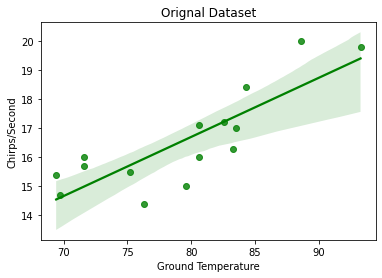

In [ ]:
plt.Figure(figsize=(8,8))
plt.title('Orignal Dataset',fontsize=12)
sns.regplot('Ground Temperature','Chirps/Second',data=df,color='g')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


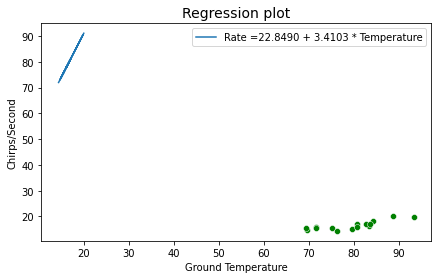

In [ ]:
plt.figure(figsize=(7,4))
plt.title("Regression plot",fontsize=14)
sns.scatterplot('Ground Temperature','Chirps/Second',data=df,color='g')
r=lr.intercept_ + lr.coef_[0] * x 
plt.plot(x,r,label=f"Rate ={(lr.intercept_):.4f} + {(lr.coef_[0]):.4f} * Temperature")
plt.legend()
plt.show()

In [ ]:

y_pred_rate = lr.intercept_ + lr.coef_ * 95 
print('Rate at which Crickets were chirping:', y_pred_rate[0])

rate=18
temp = (rate - lr.intercept_)/ lr.coef_[0]
print("Approximate Ground Temperature: ", temp)

Rate at which Crickets were chirping: 346.82966726180797
Approximate Ground Temperature:  -1.421854266812627


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
df = pd.read_fwf("brain_body.txt")
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [ ]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [ ]:
x=df['Brain']
y=df['Body']
x=x.values.reshape(-1,1)
y=y.values
reg=LinearRegression().fit(x,y)
print('coefficient,Slope:',reg.coef_[0])
print('Constant/Intercept: ',reg.intercept_)
print(f"\nEquation of the best fit line: \nbrain weight = {(reg.intercept_):.4f} + {(reg.coef_[0]):.4f} * body weight")
r_sq2 = reg.score(x,y)
print('\nR^2 --> Coefficient of Determination:', round(r_sq2,3))

coefficient,Slope: 0.9664963676725759
Constant/Intercept:  91.00439620740687

Equation of the best fit line: 
brain weight = 91.0044 + 0.9665 * body weight

R^2 --> Coefficient of Determination: 0.873


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


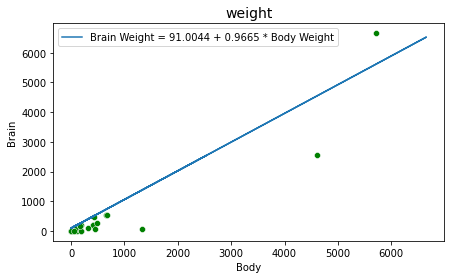

In [ ]:
plt.figure(figsize=(7,4))
plt.title('weight',fontsize=14)
sns.scatterplot('Body','Brain',data=df,color='g')
b=reg.intercept_ + reg.coef_[0] * x
plt.plot(x,b,label=f"Brain Weight = {(reg.intercept_):.4f} + {(reg.coef_[0]):.4f} * Body Weight")
plt.legend()
plt.show()

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [ ]:
df.head(3)

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200


In [ ]:
df.shape

(52, 6)

In [ ]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [ ]:
x=df.drop('Salary',axis=1)

y=df['Salary']
y=y.values

In [ ]:
model=LinearRegression().fit(x,y)

In [ ]:
print('Reg Coefficient: ')
for item in list(zip(x.columns.values,model.coef_)):
  print(f'{item[0]}: {item[1]}')

print('reg Constant/intercept: ',model.intercept_)

Reg Coefficient: 
Sex: 1241.792499601427
Rank: 5586.1814495214385
Year: 482.85976782882153
Degree: -1331.6440634059095
YSdeg: -128.79057354486122
reg Constant/intercept:  11410.14654725559


In [ ]:
r = np.array([df[i].corr(df["Salary"]) for i in df.columns[:-1]])
r2 = r**2
col=list(df.columns[:-1])
df_r2 = pd.DataFrame({'feature':col,"r2_squared":r2})
df_r2.sort_values(by="r2_squared", ascending=False)

,feature,r2_squared
1,Rank,0.752536
2,Year,0.490937
4,YSdeg,0.455428
0,Sex,0.063899
3,Degree,0.004862
